In [1]:
import os
from os import path
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.tsa.api as smt

In [2]:
df = pd.read_csv(os.path.join("data","Demand for a doubleknit fabric p269 Montgomery Fore  TS.csv"),index_col=0)

In [3]:
df.set_index('x').sort_index()

""
x
467
478
481
481
481
...
689
697
698


In [4]:
#Скользящее среднее
df['MA_window_3'] = df['x'].rolling(window=2).mean()
df

,x,MA_window_3
1,656,NaN
2,659,657.5
3,601,630.0
4,624,612.5
5,545,584.5
...,...,...
236,488,522.0
237,642,565.0
238,668,655.0
239,677,672.5


In [5]:
from statsmodels.tsa.arima.model import ARIMA

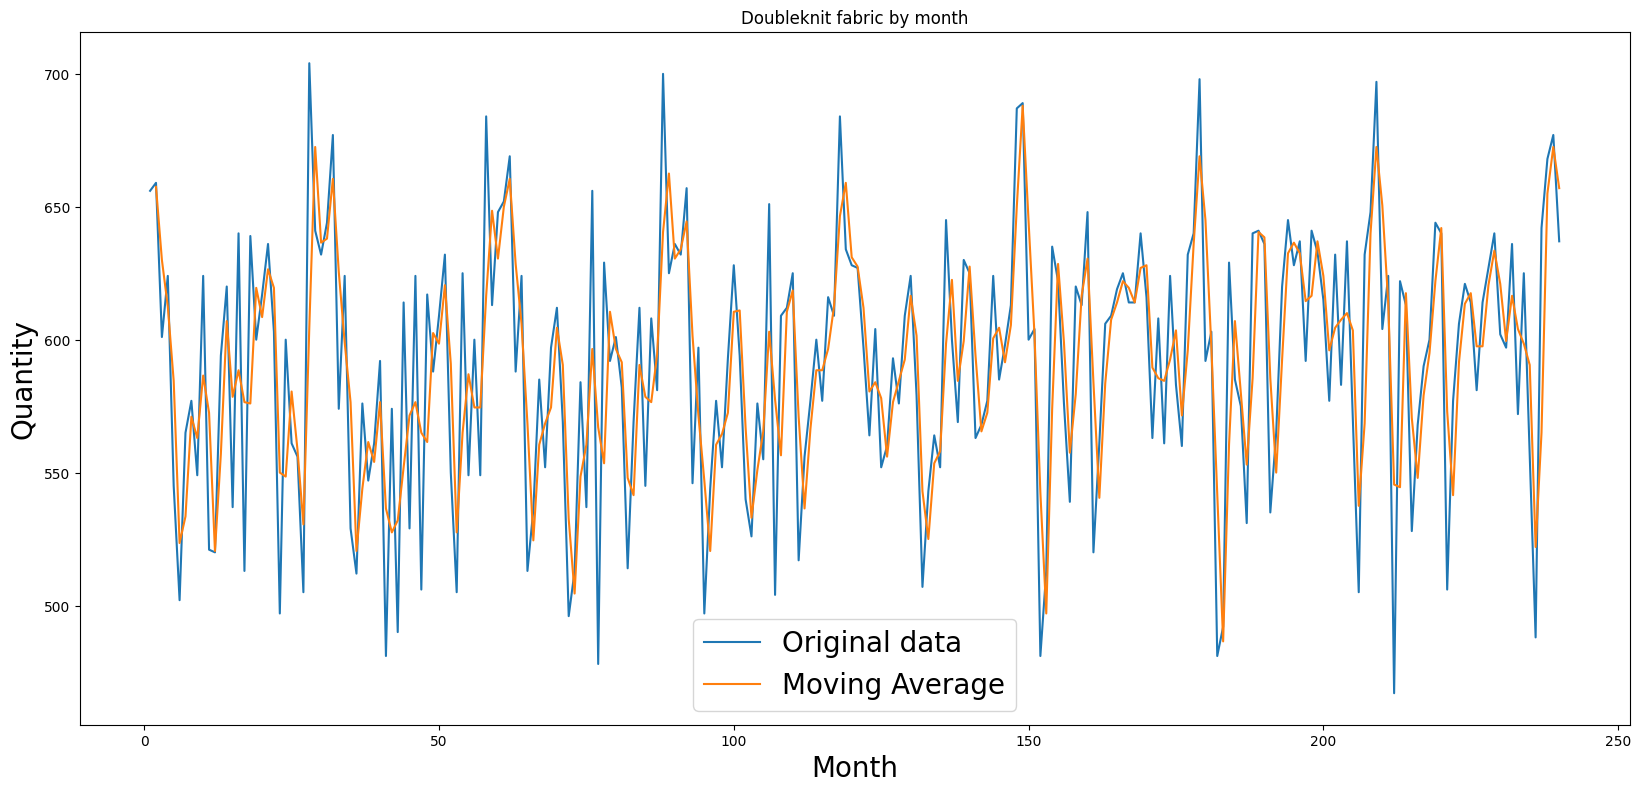

In [6]:
fig = plt.figure(figsize=(20, 9))
plt.plot(df['x'], label='Original data')
plt.plot(df['MA_window_3'], label='Moving Average')
plt.legend(fontsize="20")
plt.title('Doubleknit fabric by month')
plt.ylabel('Quantity', fontsize="20")
plt.xlabel('Month', fontsize="20")
plt.show()

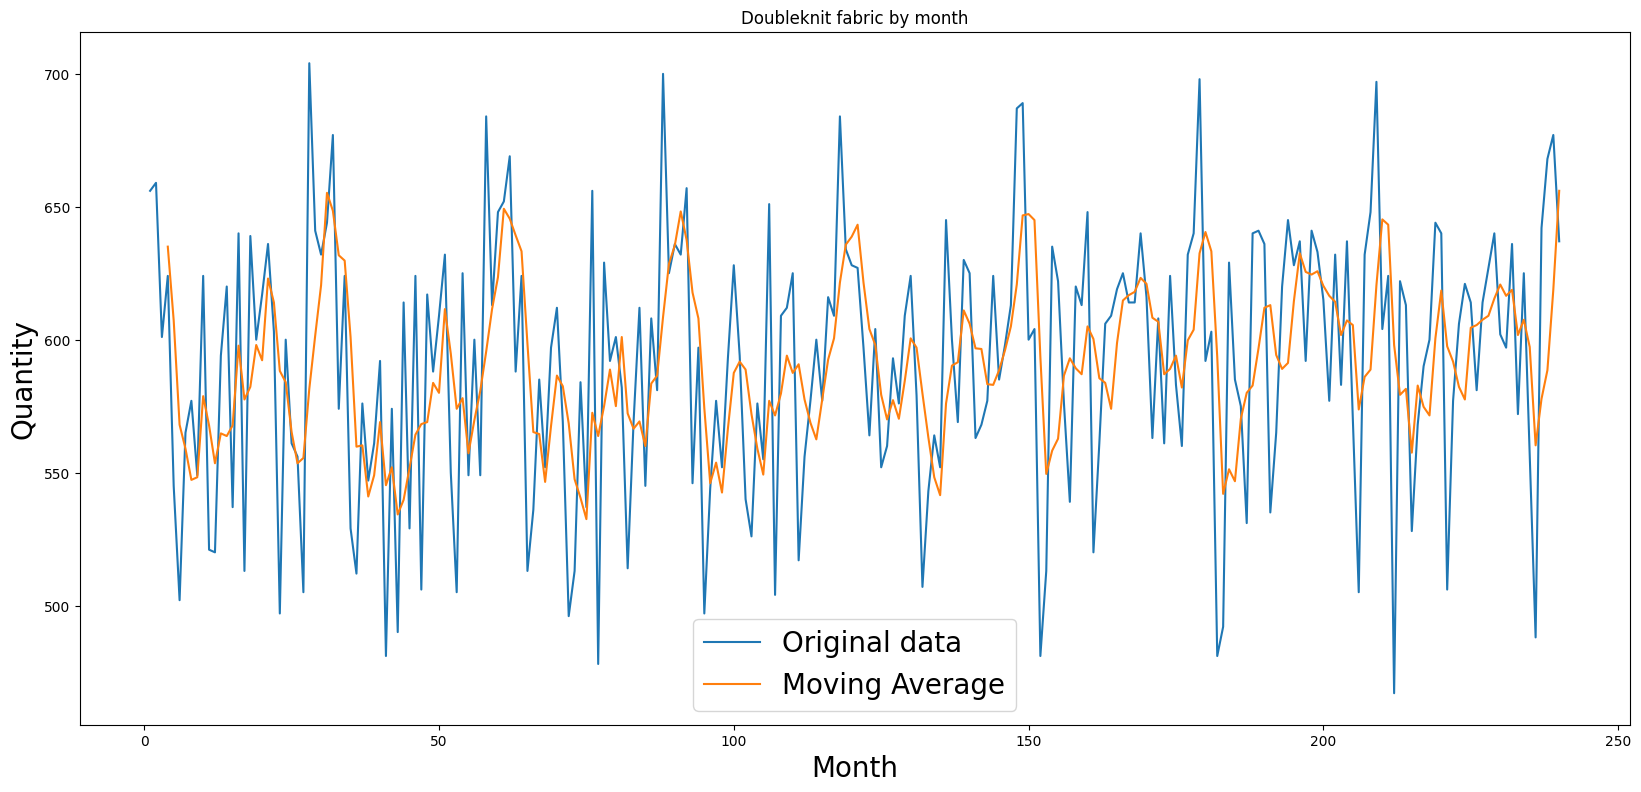

In [7]:
df['MA_window_6'] = df['x'].rolling(window=4).mean()
fig = plt.figure(figsize=(20, 9))
plt.plot(df['x'], label='Original data')
plt.plot(df['MA_window_6'], label='Moving Average')
plt.legend(fontsize="20")
plt.title('Doubleknit fabric by month')
plt.ylabel('Quantity', fontsize="20")
plt.xlabel('Month', fontsize="20")
plt.show()

In [8]:
def plot_ts(ts, plot_ma=True, plot_intervals=True, window=100,
            figsize=(15,5)):
    rolling_mean = ts.rolling(window=window).mean()
    rolling_std = ts.rolling(window=window).std()
    plt.figure(figsize=figsize)
    plt.title(ts.name)
    plt.plot(ts[window:], label='Реальные значения', color="black")
    if plot_ma:
        plt.plot(rolling_mean, 'g', label='MA'+str(window),
                 color="red")
    if plot_intervals:
        lower_bound = rolling_mean - (1.96 * rolling_std)
        upper_bound = rolling_mean + (1.96 * rolling_std)
    plt.fill_between(x=ts.index, y1=lower_bound, y2=upper_bound,
                     color='lightskyblue', alpha=0.4)
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

C:\Users\79223\AppData\Local\Temp\ipykernel_3568\2820275210.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(rolling_mean, 'g', label='MA'+str(window),


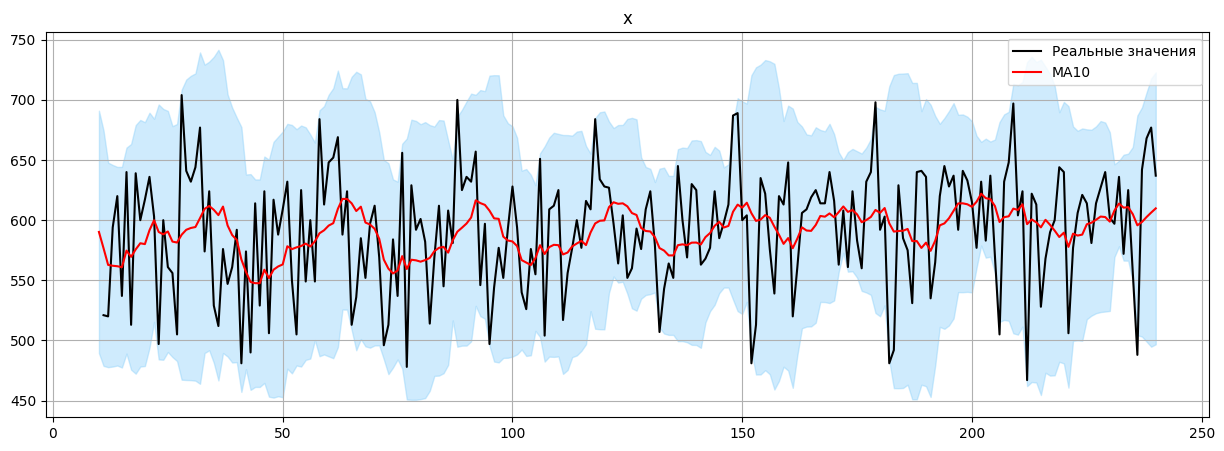

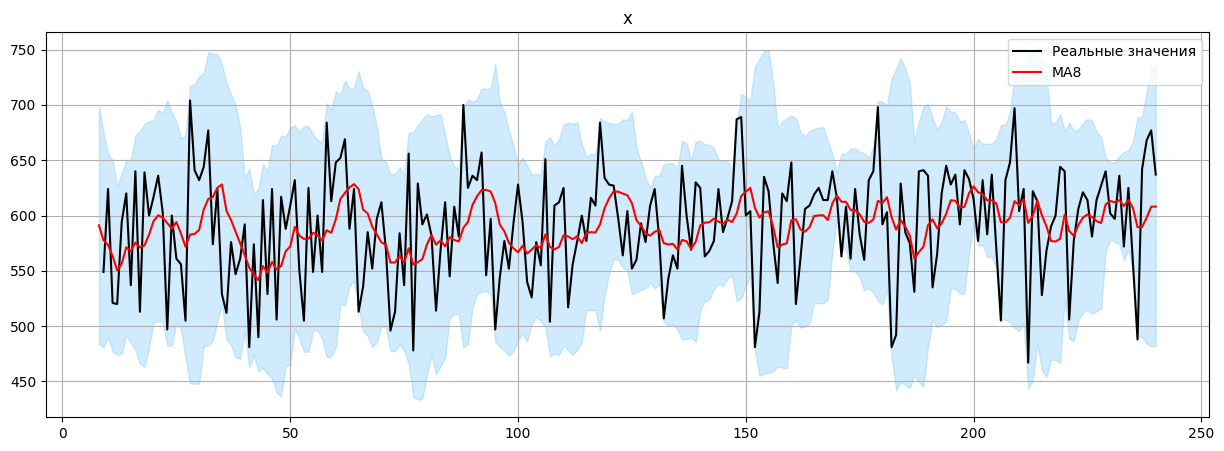

In [9]:
plot_ts(df["x"], window=10)
plot_ts(df["x"], window=8)

In [10]:
from statsmodels.tsa.arima.model import ARIMA

In [11]:
arma_model = ARIMA(df['x'], order=(5,0,3))
arma_model_fit = arma_model.fit()

C:\Users\79223\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\79223\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\79223\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\79223\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\79223

In [12]:
print(arma_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                  240
Model:                 ARIMA(5, 0, 3)   Log Likelihood               -1254.794
Date:                Wed, 06 Mar 2024   AIC                           2529.588
Time:                        21:41:51   BIC                           2564.394
Sample:                             0   HQIC                          2543.612
                                - 240                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        591.5869      4.141    142.846      0.000     583.470     599.704
ar.L1          0.6700      0.079      8.506      0.000       0.516       0.824
ar.L2          0.4398      0.104      4.212      0.0

In [13]:
X = df['x'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
arma_predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    arma_predictions.append(yhat)
    obs = test[t]
    history.append(obs)

In [14]:
print(len(train))
print(len(test))
print(len(arma_predictions))

158
82
82


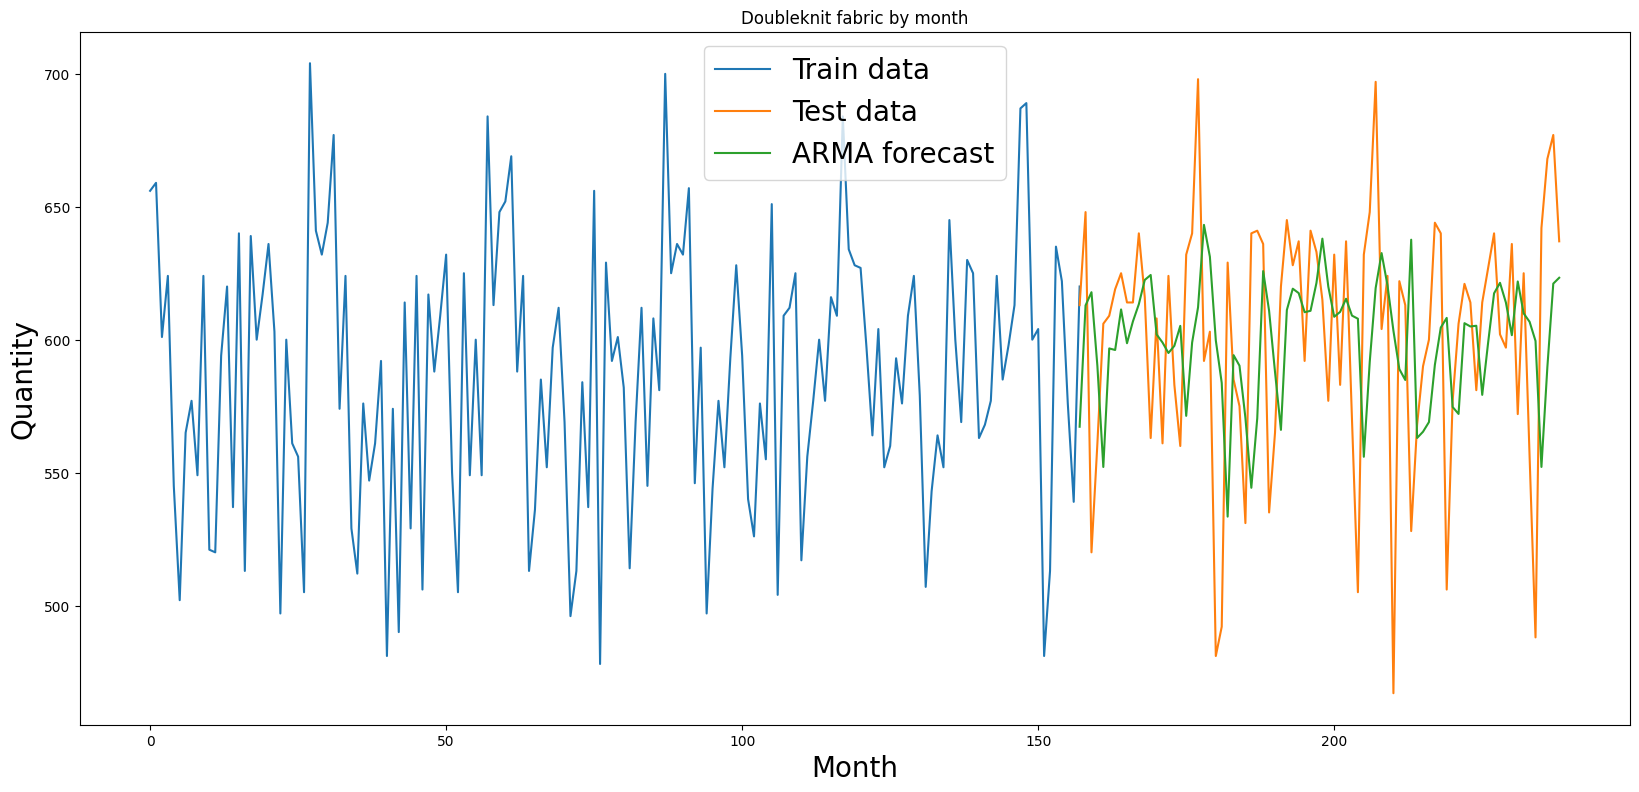

In [15]:
fig = plt.figure(figsize=(20, 9))
dur = len(arma_predictions)

plt.plot([i for i in range(0, size)], train, label='Train data')
plt.plot([i for i in range(size - 1, size - 1 + dur)], test[:dur], label='Test data')
plt.plot([i for i in range(size - 1, size - 1 + dur)], arma_predictions, label='ARMA forecast')
plt.legend(fontsize="20")
plt.title('Doubleknit fabric by month')
plt.ylabel('Quantity', fontsize="20")
plt.xlabel('Month', fontsize="20")
plt.show()

In [16]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
predict = arma_predictions

print("RMSE:", np.sqrt(mean_squared_error(test, predict)))
print("MAPE:", mean_absolute_percentage_error(test, predict))
print("MAE:", mean_absolute_error(test, predict))
print("R2: ", r2_score(test, predict))


RMSE: 52.422368393973315
MAPE: 0.07219647587067625
MAE: 41.89648362875559
R2:  -0.25445037951838656


In [17]:
from IPython.display import clear_output
%matplotlib inline

def live_plot(data_dict, figsize=(7,5), title=''):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    for label,data in data_dict.items():
        plt.plot(data, label=label)
    plt.title(title)
    plt.grid(True)
    plt.xlabel('epoch')
    plt.legend(loc='center left')
    plt.show()

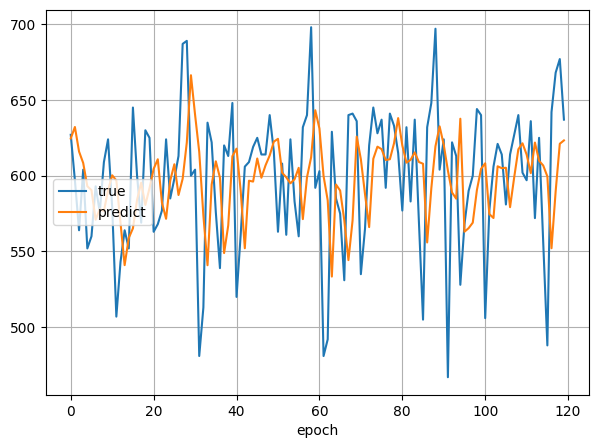

In [18]:
series = df['x']

size = int(series.shape[0] * 0.5)
train, test = series[:size], series[size:len(series)]
history = [x for x in train.values]
predictions = []

val = {"true":[], "predict":[]}
for t in test.values:
    model = ARIMA(history, order=(5,1,0)).fit()
    output = model.forecast()
    yhat = output[0]
    predictions.append(yhat)
    val["predict"].append(yhat)
    val["true"].append(t)
    history.append(t)
    live_plot(val)

In [19]:
arima_model = ARIMA(df['x'], order=(10,2,10))
arima_model_fit = arima_model.fit()

C:\Users\79223\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\79223\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\79223\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\79223\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\79223

In [20]:
print(arima_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                  240
Model:               ARIMA(10, 2, 10)   Log Likelihood               -1247.858
Date:                Wed, 06 Mar 2024   AIC                           2537.716
Time:                        21:43:00   BIC                           2610.634
Sample:                             0   HQIC                          2567.103
                                - 240                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8704      0.210     -8.904      0.000      -2.282      -1.459
ar.L2         -2.2534      0.283     -7.970      0.000      -2.808      -1.699
ar.L3         -2.6797      0.420     -6.387      0.0

<Axes: >

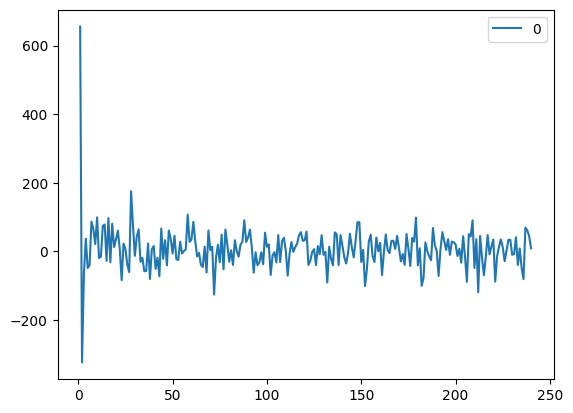

In [21]:
#Линейный график остаточных ошибок
arima_residuals = pd.DataFrame(arima_model_fit.resid)
arima_residuals.plot()

In [22]:
output = arima_model_fit.forecast()

C:\Users\79223\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\79223\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [23]:
X = df['x'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
arima_predictions = list()
# walk-forward validation
for t in range(len(test)):
    arima_model = ARIMA(history, order=(10,2,5))
    arima_model_fit = arima_model.fit()
    output = arima_model_fit.forecast()
    yhat = output[0]
    arima_predictions.append(yhat)
    obs = test[t]
    history.append(obs)

C:\Users\79223\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\79223\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\79223\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\79223\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn

C:\Users\79223\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\79223\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\79223\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\79223\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optim

C:\Users\79223\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\79223\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\79223\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\79223\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optim

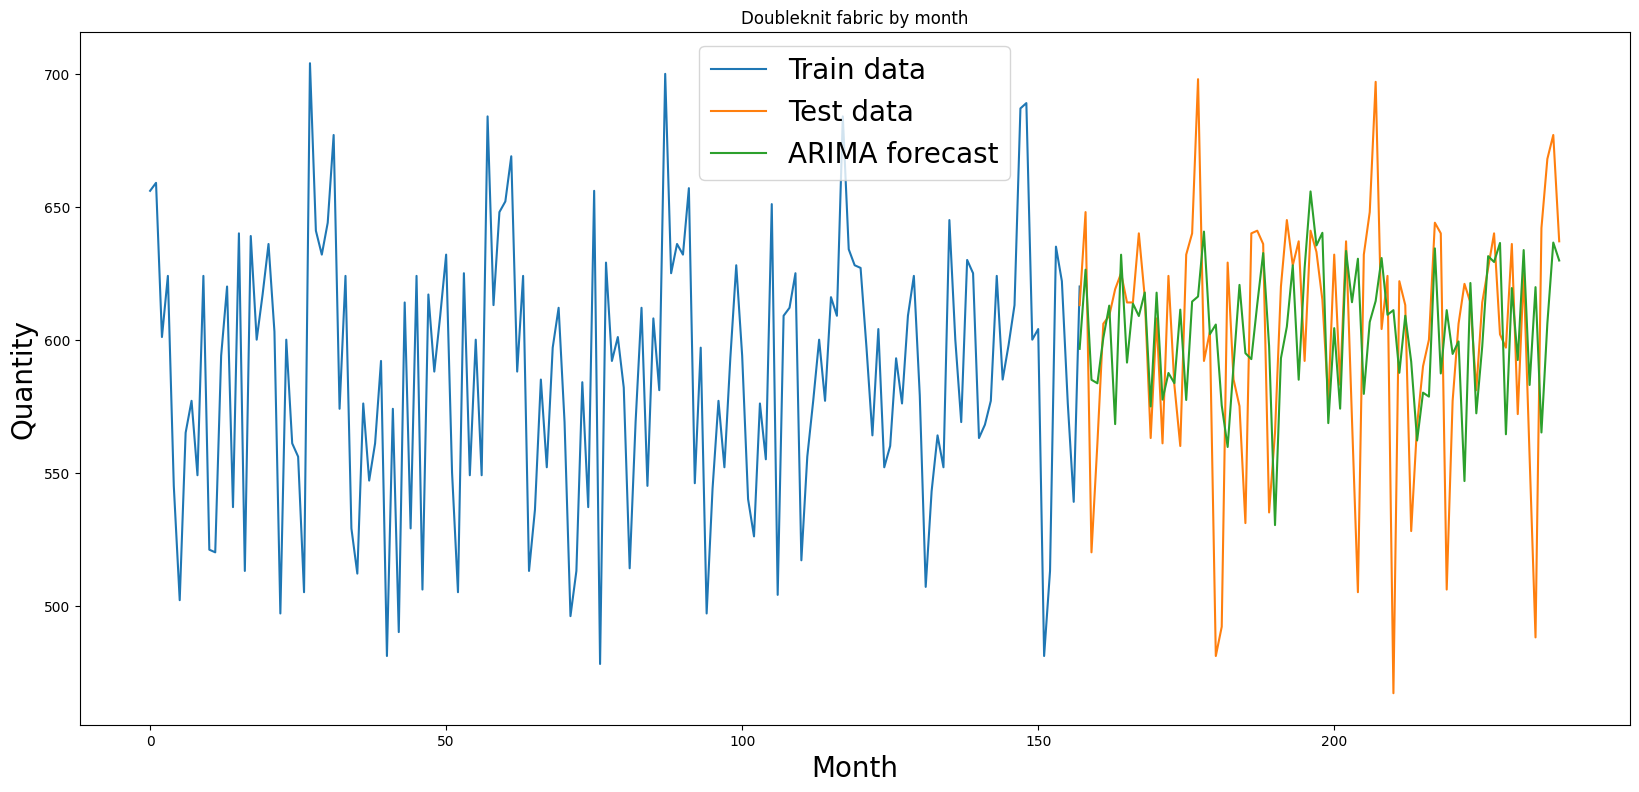

In [25]:
fig = plt.figure(figsize=(20, 9))
plt.plot([i for i in range(0, size)], train, label='Train data')
plt.plot([i for i in range(size - 1, len(X) - 1)], test, label='Test data')
plt.plot([i for i in range(size - 1, len(X) - 1)], arima_predictions, label='ARIMA forecast')
plt.legend(fontsize="20")
plt.title('Doubleknit fabric by month')
plt.ylabel('Quantity', fontsize="20")
plt.xlabel('Month', fontsize="20")
plt.show()

In [26]:
print("RMSE:", np.sqrt(mean_squared_error(test, arima_predictions)))
print("MAPE:", mean_absolute_percentage_error(test, arima_predictions))
print("MAE:", mean_absolute_error(test, arima_predictions))
print("R2:", r2_score(test, arima_predictions))

RMSE: 47.603083673609966
MAPE: 0.06043631234708754
MAE: 34.657120293828804
R2: -0.03440446033764677


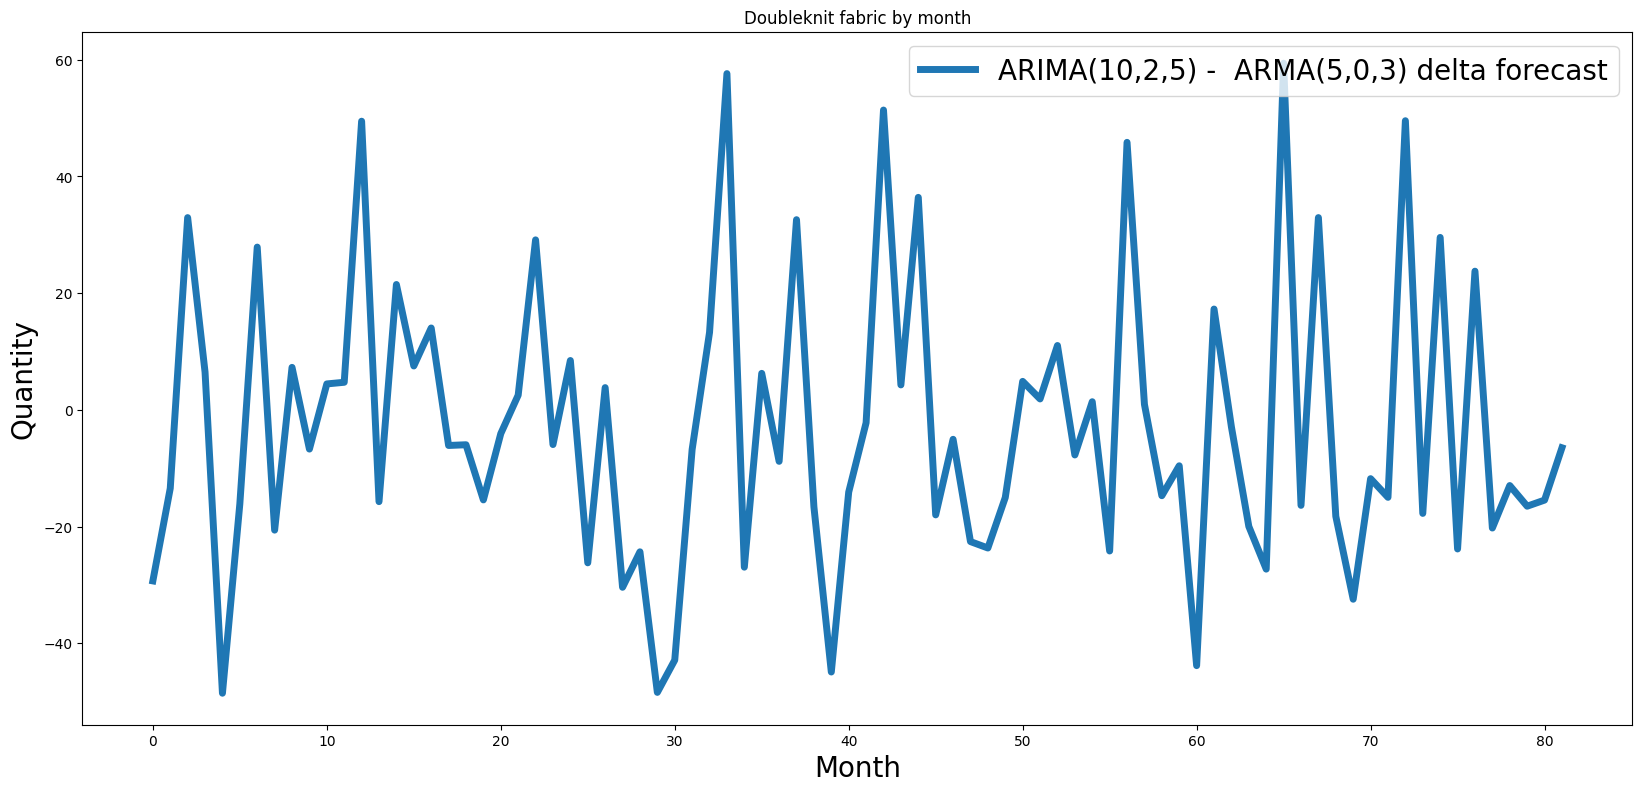

In [27]:
fig = plt.figure(figsize=(20, 9))

delta = []

for i in range(len(arima_predictions)):
    delta.append(arma_predictions[i] - arima_predictions[i])

plt.plot(delta, label='ARIMA(10,2,5) -  ARMA(5,0,3) delta forecast', linewidth=5)
plt.legend(fontsize="20")
plt.title('Doubleknit fabric by month')
plt.ylabel('Quantity', fontsize="20")
plt.xlabel('Month', fontsize="20")
plt.show()

<Axes: >

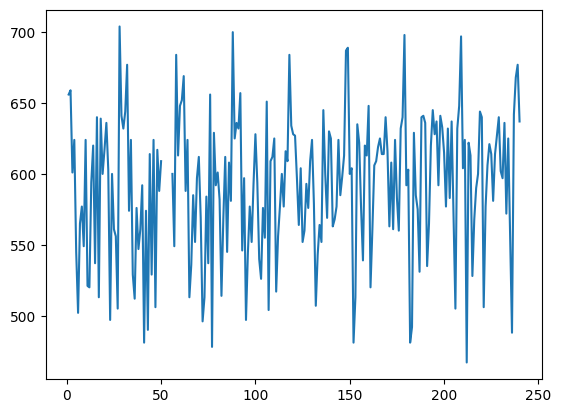

In [28]:
#Работа с пропусками в данных
#Заполнение средним

o_df = df["x"].copy()
o_df[50:55] = np.nan
o_df.plot()


594.0


<Axes: title={'center': 'среднее из предыдущего и последующего'}>

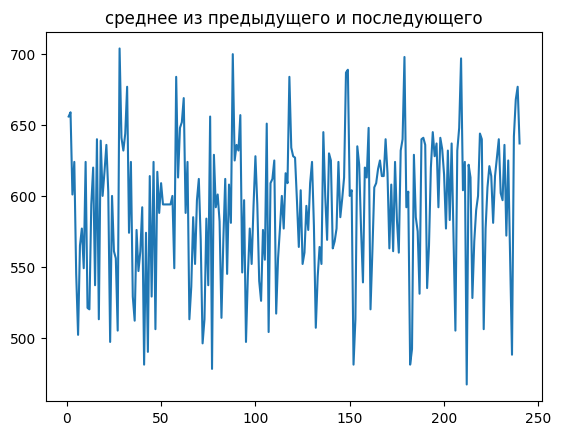

In [29]:
new_value = (o_df[49] + o_df[56])/2
print(new_value)

o_df[50:55] = new_value

o_df.plot(title="среднее из предыдущего и последующего")

594.0


<Axes: title={'center': 'Последующее значение'}>

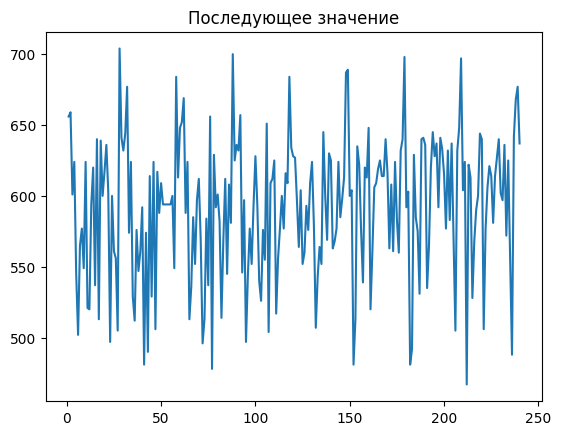

In [30]:
new_value = o_df[55]
print(new_value)

o_df[50:55] = new_value

o_df.plot(title='Последующее значение')

609.0


<Axes: title={'center': 'Предыдущее значение'}>

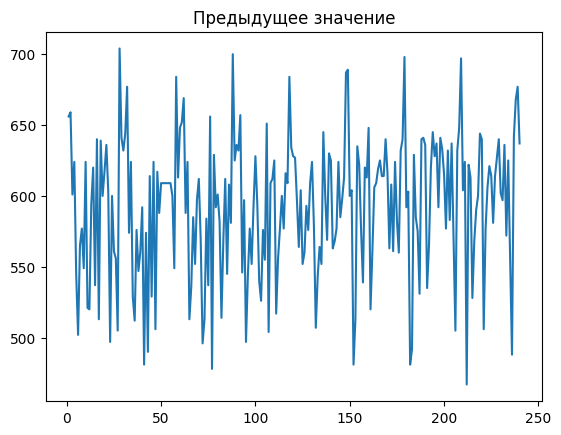

In [31]:
new_value = o_df[50]
print(new_value)

o_df[50:55] = new_value

o_df.plot(title='Предыдущее значение')

600.0


<Axes: title={'center': 'медиана'}>

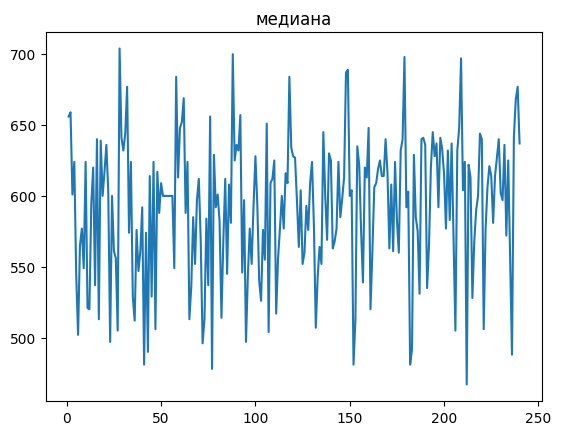

In [32]:
new_value = o_df.median()
print(new_value)

o_df[50:55] = new_value

o_df.plot(title='медиана')

592.1625


<Axes: title={'center': 'среднее'}>

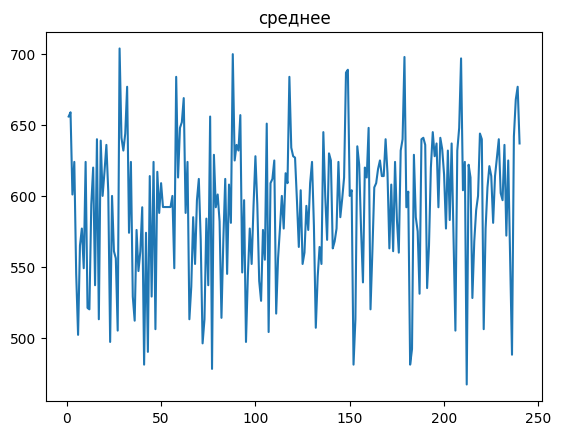

In [33]:
new_value = o_df.mean()
print(new_value)

o_df[50:55] = new_value

o_df.plot(title='среднее') 

<Axes: title={'center': 'zero'}>

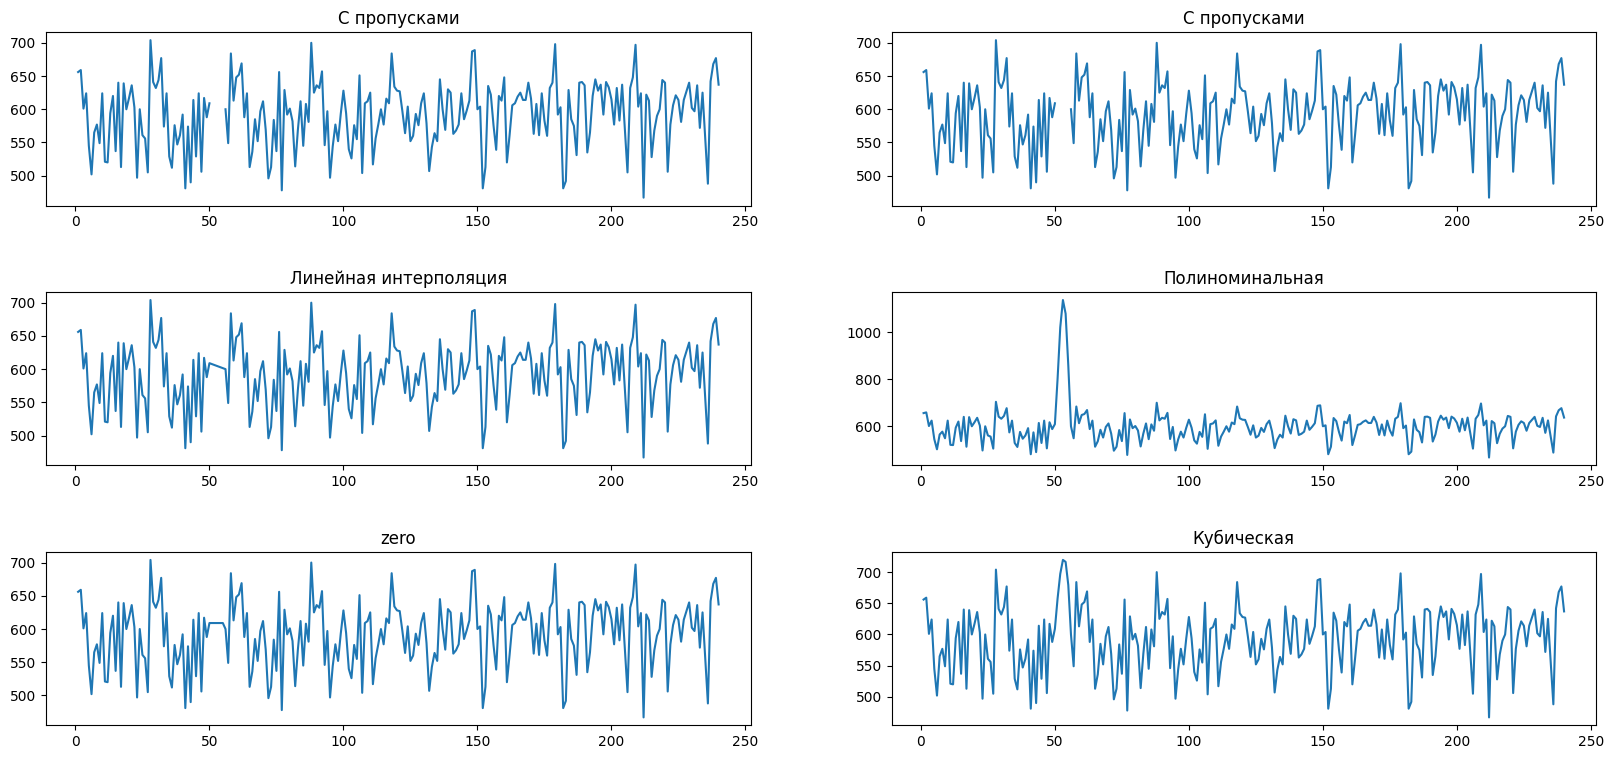

In [34]:
#Интерполяция

o_df[50:55] = np.nan

lin_df = o_df.interpolate(method="linear")

cub_df = o_df.interpolate(method="cubic")

pol_df = o_df.interpolate(method="polynomial", order=5)

zero_df = o_df.interpolate(method="zero")


fig = plt.figure(figsize=(20, 9))
layout = (3, 2)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

original_ax = plt.subplot2grid(layout, (0, 0))
lin_ax = plt.subplot2grid(layout, (1, 0))
cub_ax = plt.subplot2grid(layout, (2, 1))

pol_ax = plt.subplot2grid(layout, (1, 1))
zero_ax = plt.subplot2grid(layout, (2, 0))
 
o_df.plot(title="С пропусками", ax = original_ax)  
o_df.plot(title="С пропусками", ax = plt.subplot2grid(layout, (0, 1)))  
lin_df.plot(title="Линейная интерполяция", ax = lin_ax) 
cub_df.plot(title="Кубическая", ax = cub_ax) 
pol_df.plot(title="Полиноминальная", ax = pol_ax) 
zero_df.plot(title="zero", ax=zero_ax)

In [35]:
#Работа с выбросами

import seaborn as sns

In [36]:
# загружаем с выбросами
data = pd.read_csv('data/Demand for a doubleknit fabric p269 Montgomery Fore  TS.csv')
data.set_index('x').sort_index()

,Unnamed: 0
x,
467,212
478,77
481,41
481,182
481,152
...,...
689,149
697,209
698,179


<Axes: >

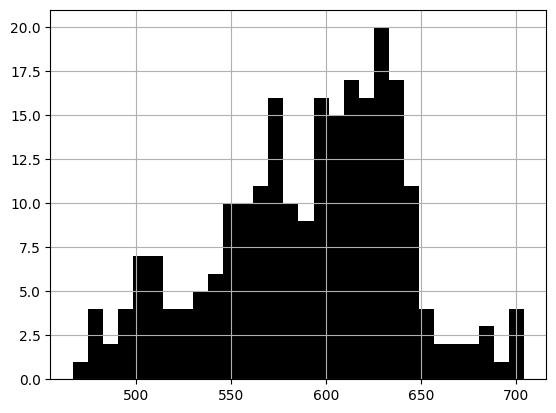

In [37]:
data["x"].hist(bins=30, color="black")

Text(0.5, 1.0, 'Doubleknit fabric')

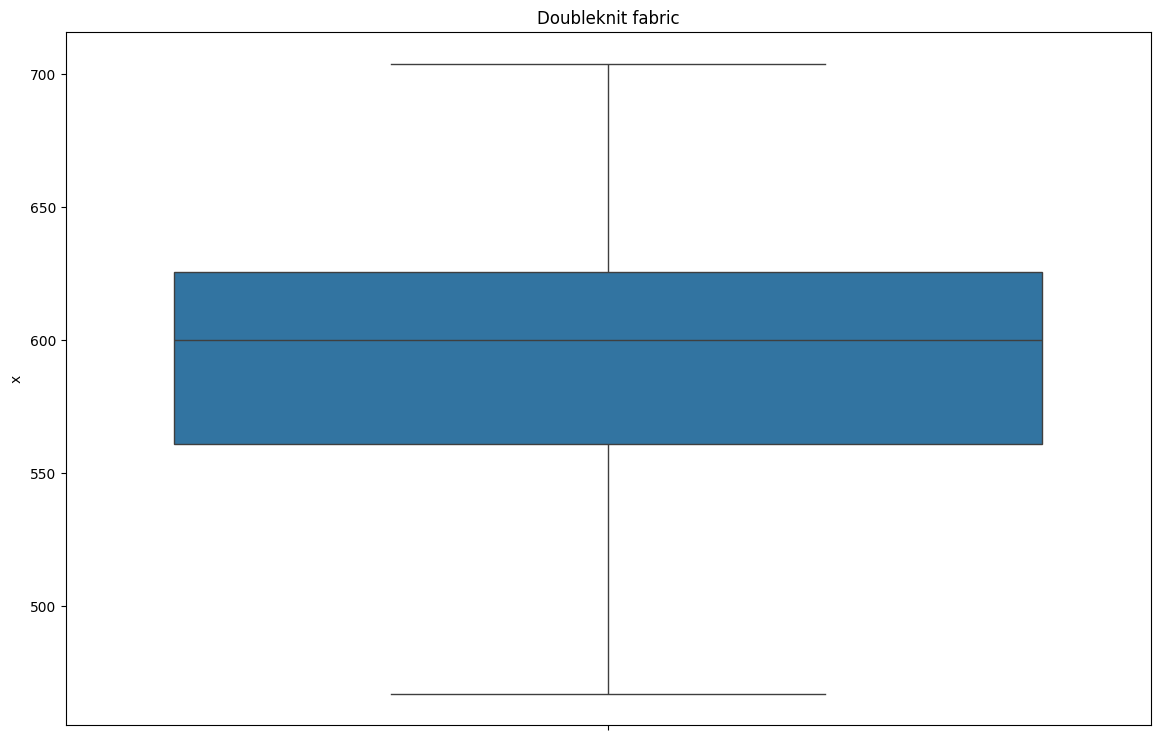

In [38]:
fig = plt.figure(figsize=(14, 9))
 
sns.boxplot(data.x).set_title('Doubleknit fabric')

In [39]:
from sklearn import preprocessing, svm

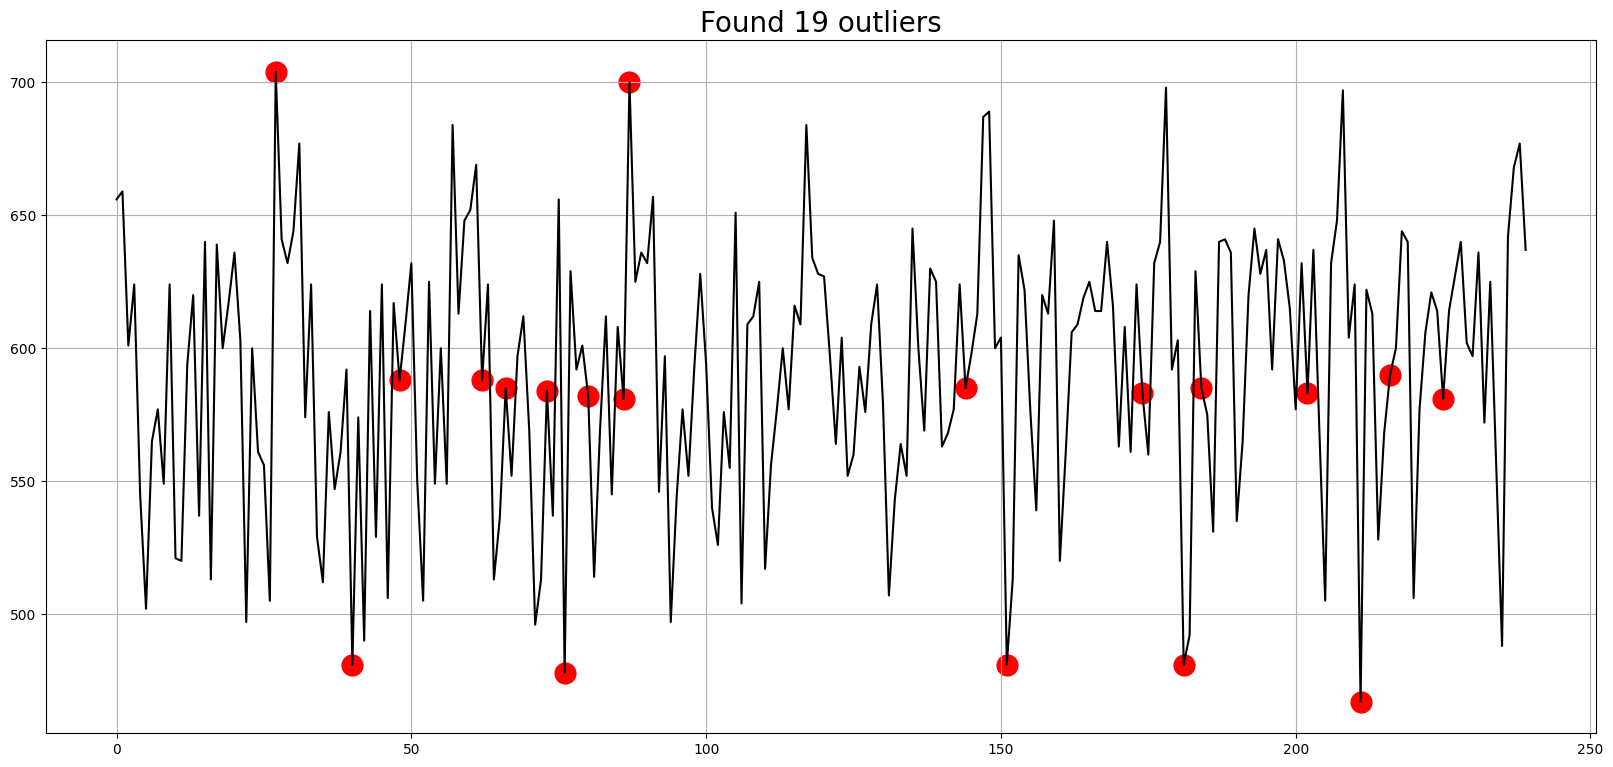

In [40]:
scaler = preprocessing.StandardScaler()
perc = 0.04

local_df = data["x"]

ts_scaled = scaler.fit_transform(local_df.values.reshape(-1, 1))
model = svm.OneClassSVM(nu=perc, kernel="rbf", gamma='scale')  
model.fit(ts_scaled)

dtf_outliers = local_df.to_frame(name="ts")
dtf_outliers["index"] = range(len(local_df))
dtf_outliers["outlier"] = model.predict(ts_scaled)
dtf_outliers["outlier"] = dtf_outliers["outlier"].apply(lambda x: 1 if x == -1 else 0)

fig, ax = plt.subplots(figsize=(20, 9))
ax.plot(dtf_outliers["index"], dtf_outliers["ts"], color="black")
ax.scatter(x=dtf_outliers[dtf_outliers["outlier"] == 1]["index"],
           y=dtf_outliers[dtf_outliers["outlier"] == 1]['ts'],
           color='red', linewidths=10)

plt.title(f"Found {sum(dtf_outliers['outlier'] == 1)} outliers", fontdict={'fontsize': 20})
ax.grid(True)
plt.show()

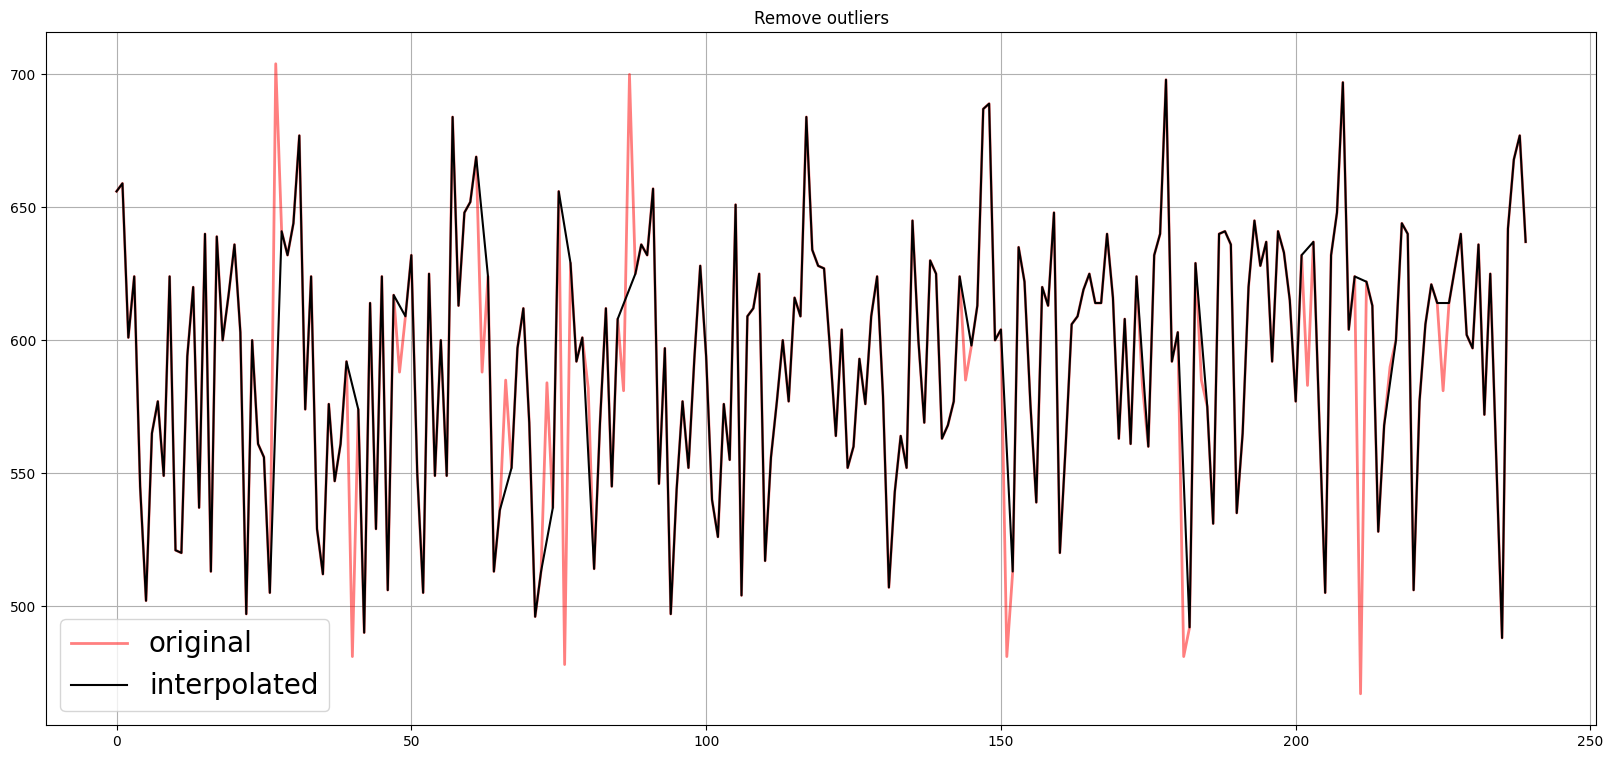

In [41]:
outliers_idx = dtf_outliers[dtf_outliers["outlier"]==1].index

ts_clean = local_df.copy()
ts_clean.loc[outliers_idx] = np.nan
ts_clean = ts_clean.interpolate(method="linear")
ax = local_df.plot(figsize=(20, 9), color="red", alpha=0.5,
             title="Remove outliers", label="original", legend=True, linewidth=2)
ts_clean.plot(ax=ax, grid=True, color="black",
              label="interpolated", legend=True)
plt.legend(fontsize="20")
plt.show()